# 05 - Decision Tree
---

### **Introduction**
Single decision trees are often quite weak models at making predictions. However many machine learning algorithms (e.g. random forests, gradient boosting) combine together many decision trees in clever ways to produce a better performing model. Thus it is important to understand how single decision trees work. 

The basic idea is that we form a graph of nodes connected by branches. The top node is called the root node, the middle nodes are the interior nodes and the bottom nodes are called leaves. Each root and interior node has a condition which is True or False. To categorise new data, you simple follow the path from the root node, through the interior nodes which correspond to True for you data until you arrive at the leaf node and this your prediction. 

Note that decision trees which predict discrete target are called **classification** trees while those that predict a continuous target are called **regression trees**. 

In the simple example below, we build a decision tree to decide whether or not to wear a coat based on the current temperature and whether or not it is raining. 

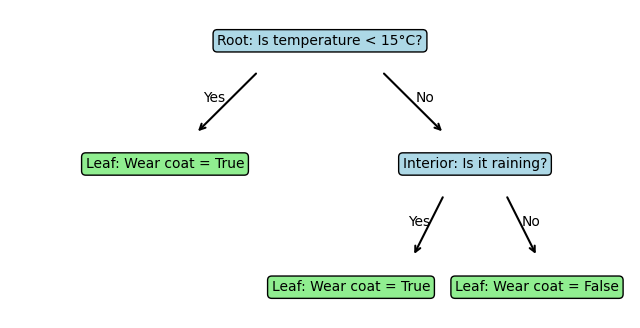

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")

# Nodes (coat decision)
ax.text(0.5, 0.9, "Root: Is temperature < 15°C?", ha="center", va="center",
    bbox=dict(boxstyle="round", fc="lightblue", ec="black"))
ax.text(0.25, 0.5, "Leaf: Wear coat = True", ha="center", va="center",
    bbox=dict(boxstyle="round", fc="lightgreen", ec="black"))
ax.text(0.75, 0.5, "Interior: Is it raining?", ha="center", va="center",
    bbox=dict(boxstyle="round", fc="lightblue", ec="black"))
ax.text(0.55, 0.1, "Leaf: Wear coat = True", ha="center", va="center",
    bbox=dict(boxstyle="round", fc="lightgreen", ec="black"))
ax.text(0.85, 0.1, "Leaf: Wear coat = False", ha="center", va="center",
    bbox=dict(boxstyle="round", fc="lightgreen", ec="black"))

# Arrows
ax.annotate("", xy=(0.3, 0.6), xytext=(0.4, 0.8),
        arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(0.33, 0.7, "Yes", ha="center")

ax.annotate("", xy=(0.7, 0.6), xytext=(0.6, 0.8),
        arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(0.67, 0.7, "No", ha="center")

ax.annotate("", xy=(0.65, 0.2), xytext=(0.7, 0.4),
        arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(0.66, 0.3, "Yes", ha="center")

ax.annotate("", xy=(0.85, 0.2), xytext=(0.8, 0.4),
        arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(0.84, 0.3, "No", ha="center")

plt.show()


### **Gini Impurity - Discrete Target**
Given a dataset of multiple features (continuous and discrete) we would like to build a classification tree for a discrete target. We have two things we need to decide:
- Which features should we use and what order should they be used in?
- For the continuous features, which threshold value should we use to split the data at the node? 

There are many metrics that we can use to achieve this but the simplest and most common is **Gini impurity**. The idea of impurity relates to how mixed the data in a node is. If the 100% of the data in a node falls into a single class it is said to be pure whereas if there are a mixture of classes it is said to be impure. The most impure a node can be is if there is an equal number of examples of each class within the node. The basic idea behind how decision trees are fit is to build the tree in a way that creates the most purity in the nodes. 

Gini impurity works slightly differently for discrete predictors versus continuous predictors. 

To calculate the Gini impurity of a binary predictor we do the following:
1. Build a decision tree with two leaves which correspond to whether each data point is True or False for the binary predictor
2. Calculate the Gini Impurity of each leaf as $1 - \mathbb{P}(y = True)^2 - \mathbb{P}(y=False)^2$. The We calculate these probabilities by looking at the value of the target for the data within the leaf.
3. Calculate the total Gini Impurity for the binary predictor as a weighted average of the Gini Impurity for each leaf. The weighting should be by the number of examples in each leaf $\frac{leaf\_size_1 * gini\_impurity_1 + leaf\_size_2 * gini\_impurity_2}{leaf\_size_1 + leaf\_size_2}$

If the discrete predictor has more than 2 classes we do the following:
1. Choose each class in turn and create a binary condition i.e. value == class
2. Compute the Gini impurity for this binary condition as above
3. Choose the class with the lowest Gini impurity - this is the Gini Impurity for the discrete predictor 

To calculate the Gini impurity of a continuous predictor we do the following:
1. Order the values of the continuous predictor smallest to largest
2. For each adjacent pair of values, calculate their average. These will be the candidates for how to split the data
3. For each candidate create a binary condition i.e. value < candidate 
4. Calculate the Gini impurity for this binary condition as above
5. Choose the candidate with the lowest Gini impurity - this is the Gini Impurity for the continuous predictor

To build the tree we do the following:
1. Compute the Gini impurity for each predictor
2. Choose the predictor with the lowest Gini impurity and set it as the root node
3. Categorise the data into the two relevant interior nodes which branch off the root node
4. For each node
    - If it only includes examples from one class, the node is pure so we stop and categorise the node as a leaf. Note that in this case the the Gini impurity is 0. 
    - If it contains examples from a mixture of classes the node is impure and hence will have a non-zero Gini impurity
5. For any impure node, compute the Gini impurity for each predictor
6. Choose the predictor with the lowest Gini impurity and branch off again.
7. Continue in this way, computing the Gini impurity and branching off until either all nodes are pure or we reach a maximum tree depth. 

When making a prediction we simple follow the path through the tree that relates to the data until we reach a leaf node. If the leaf node is pure we simply predict the class present in the node. However, if we reach the maximum tree depth before we achieve purity in all leaf nodes, the leaf node will contain a mixture of classes. Therefore we need to decide which class our prediction should be assigned. We could choose the modal (i.e. most common) class or we could sample proportionatly from the classes present in the leaf node. 

### **RSS - Continuous Target**
Given a dataset of multiple features (continuous and discrete) we would like to build a regression tree for a continuous target. As with the classification tree, we have two things we need to decide:
- Which features should we use and what order should they be used in?
- For the continuous features, which threshold value should we use to split the data at the node? 

Before we discuss how we achieve this, we need to address how predictions are calculated. Remember that the target here is continuous and the leaf nodes will contain potentially multiple examples. Hence we need to use a summary statistic for the contunous target values in each leaf node. Typically we choose their mean. 

In regression trees, rather than Gini impurity we choose the predictor and threshold using the residual sum of squares (RSS). This is implemented slightly differently for discrete predictors versus continuous predictors. 

To calculate the RSS of a binary predictor we do the following:
1. Build a decision tree with two leaves which correspond to whether each data point is True or False for the binary predictor
2. Calculate the mean of the target within each leaf - this will be the prediction for the data points within that leaf
3. Calculate the RSS $\sum_{i}(y_i - mean_i)^2 + \sum_{j}(y_j - mean_j)^2$ for $i \in leaf_{True}$ and $j \in leaf_{False}$

If the discrete predictor has more than 2 classes we do the following:
1. Choose each class in turn and create a binary condition i.e. value == class
2. Compute the RSS for this binary condition as above
3. Choose the class with the lowest RSS - this is the RSS for the discrete predictor 

To calculate the RSS of a continuous predictor we do the following:
1. Order the values of the continuous predictor smallest to largest
2. For each adjacent pair of values, calculate their average. These will be the candidates for how to split the data
3. For each candidate create a binary condition i.e. value < candidate 
4. Calculate the RSS for this binary condition as above
5. Choose the candidate with the lowest RSS - this is the RSS for the continuous predictor

To build the tree we do the following:
1. Compute the RSS for each predictor
2. Choose the predictor with the lowest RSS and set it as the root node
3. Categorise the data into the two relevant interior nodes which branch off the root node
4. For each node
    - If it has less than a set threhsold number of examples, stop to prevent overfitting and categorise the node as a leaf
    - If it contains more than a set threhsold number of examples, we continue
5. For any node with more than a set threhsold number of examples, compute the RSS for each predictor
6. Choose the predictor with the lowest RSS and branch off again.
7. Continue in this way, computing the RSS and branching off until either all nodes have too few exanples, or we reach a maximum tree depth

When making a prediction we simple follow the path through the tree that relates to the data until we reach a leaf node. The prediction is the mean of the continuous target values in the leaf. 